<a href="https://colab.research.google.com/github/pm1596/Sentiment-Analysis/blob/master/MyNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install keras

In [0]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
import re
from keras.utils.np_utils import to_categorical
import nltk,sys
import nltk.data
from nltk.stem.porter import *
pd.options.mode.chained_assignment = None

In [0]:
from google.colab import files
uploaded = files.upload()

Saving sa_train.csv to sa_train.csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['sa_train.csv']))
data2 = pd.read_csv(io.BytesIO(uploaded['sa_train.csv']))

In [0]:
data = data[['text']]

In [0]:
short_data = data.head()

In [0]:
#remove stopwords

from nltk.corpus import stopwords
stop = stopwords.words("english")
print(short_data['text'])
print('-------Remove Stop Word--------')
short_data['Step1_SentimentText'] = short_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(short_data['Step1_SentimentText'])

0    Autoimmune diseases tend to come in clusters. ...
1    I can completely understand why you’d want to ...
2    Interesting that it only targets S1P-1/5 recep...
3    Very interesting, grand merci. Now I wonder wh...
4    Hi everybody, My latest MRI results for Brain ...
Name: text, dtype: object
-------Remove Stop Word--------
0    Autoimmune diseases tend come clusters. As Gil...
1    I completely understand you’d want try it. But...
2    Interesting targets S1P-1/5 receptors rather 1...
3    Very interesting, grand merci. Now I wonder le...
4    Hi everybody, My latest MRI results Brain Cerv...
Name: Step1_SentimentText, dtype: object


In [0]:
#Stemming

ps = PorterStemmer()
short_data['Step2_SentimentText'] = short_data['Step1_SentimentText'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() ]))
print(short_data['Step2_SentimentText'])

0    autoimmun diseas tend come clusters. As gileny...
1    I complet understand you’d want tri it. but, r...
2    interest target s1p-1/5 receptor rather 1-5 li...
3    veri interesting, grand merci. now I wonder le...
4    Hi everybody, My latest mri result brain cervi...
Name: Step2_SentimentText, dtype: object


In [0]:
#Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
nltk.download('wordnet')
#print('-------Lemmazation--------')
short_data['Step3_SentimentText'] = short_data['Step2_SentimentText'].apply(lambda x: ' '.join([lmtzr.lemmatize(word,'v') for word in x.split() ]))
print(short_data['Step3_SentimentText'])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
0    autoimmun diseas tend come clusters. As gileny...
1    I complet understand you’d want tri it. but, r...
2    interest target s1p-1/5 receptor rather 1-5 li...
3    veri interesting, grand merci. now I wonder le...
4    Hi everybody, My latest mri result brain cervi...
Name: Step3_SentimentText, dtype: object


In [0]:
#Capitalization
short_data['Step4_SentimentText'] = short_data['Step2_SentimentText'].apply(  lambda x: ' '.join( [ word.upper() for word in x.split() ] ) )
print(short_data['Step4_SentimentText'])

0    AUTOIMMUN DISEAS TEND COME CLUSTERS. AS GILENY...
1    I COMPLET UNDERSTAND YOU’D WANT TRI IT. BUT, R...
2    INTEREST TARGET S1P-1/5 RECEPTOR RATHER 1-5 LI...
3    VERI INTERESTING, GRAND MERCI. NOW I WONDER LE...
4    HI EVERYBODY, MY LATEST MRI RESULT BRAIN CERVI...
Name: Step4_SentimentText, dtype: object


In [0]:
#POS tagging
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
short_data['Step5_SentimentText'] = short_data['Step2_SentimentText'].apply(  lambda x:nltk.pos_tag(nltk.word_tokenize(x)))
print(short_data['Step5_SentimentText'])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
0    [(autoimmun, JJ), (diseas, NNS), (tend, VBP), ...
1    [(I, PRP), (complet, VBP), (understand, VB), (...
2    [(interest, NN), (target, NN), (s1p-1/5, JJ), ...
3    [(veri, NN), (interesting, NN), (,, ,), (grand...
4    [(Hi, NNP), (everybody, NN), (,, ,), (My, NNP)...
Name: Step5_SentimentText, dtype: object


In [0]:
data = data2.sentiment != "0"
print(data[data2.sentiment == "1"].size)

0


/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [0]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1], dropout=0.2))
model.add(LSTM(lstm_out, dropout_U=0.2, dropout_W=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(196, dropout=0.2, recurrent_dropout=0.2)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 15936, 128)        256000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 591       
Total params: 511,391
Trainable params: 511,391
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
Y = pd.get_dummies(data['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3536, 15936) (3536, 3)
(1743, 15936) (1743, 3)


In [0]:
batch_size = 32
model.fit(X_train, Y_train, nb_epoch = 10, batch_size=batch_size, verbose = 2)
#history = model.fit(x_train, y_train, nb_epoch=10, validation_split=0.2, shuffle=True)

In [0]:
validation_size = 2000

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 0.70
acc: 0.82


In [0]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

pos_acc 55.256723716381416 %
neg_acc 91.07479572595851 %


Train on 6469 samples, validate on 719 samples
Epoch 1/10
6469/6469 [==============================] - 79s 12ms/step - loss: 0.1186 - acc: 0.9547 - val_loss: 0.1860 - val_acc: 0.9193
Epoch 2/10
6469/6469 [==============================] - 82s 13ms/step - loss: 0.1049 - acc: 0.9567 - val_loss: 0.2594 - val_acc: 0.9068
Epoch 3/10
6469/6469 [==============================] - 80s 12ms/step - loss: 0.0970 - acc: 0.9606 - val_loss: 0.2615 - val_acc: 0.9054
Epoch 4/10
6469/6469 [==============================] - 80s 12ms/step - loss: 0.0911 - acc: 0.9632 - val_loss: 0.2989 - val_acc: 0.8860
Epoch 5/10
6469/6469 [==============================] - 81s 13ms/step - loss: 0.0843 - acc: 0.9671 - val_loss: 0.3288 - val_acc: 0.8929
Epoch 6/10
6469/6469 [==============================] - 81s 12ms/step - loss: 0.0769 - acc: 0.9680 - val_loss: 0.3454 - val_acc: 0.8832
Epoch 7/10
6469/6469 [==============================] - 82s 13ms/step - loss: 0.0759 - acc: 0.9691 - val_loss: 0.4016 - val_acc: 0.8901
E

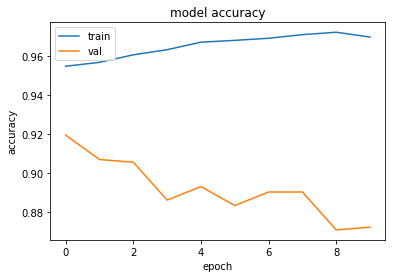

In [0]:
import keras
from matplotlib import pyplot as plt
history = model.fit(X_train, Y_train,validation_split = 0.1, epochs=10, batch_size=4)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

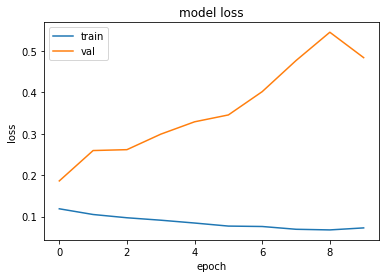

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()